## Machine Learning HW4
Gaumart Siméon . 0845209

# Problem 1 :

In [2]:
import mnist #package from https://github.com/datapythonista/mnist to read mnist datas

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#reshape train_images and test_images that it fits with sklearn
X_train = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
X_test = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
for i in range(len(X_train)):
    for j in range(len(X_train[0])):
        if (X_train[i][j]>=128):
            X_train[i][j]=1
        else:
            X_train[i][j]=0

KeyboardInterrupt: 

In [3]:
import numpy as np
import os
import gzip
import struct
from six.moves import urllib
import operator
from datetime import datetime

def _read32(bytestream):
    dt = np.dtype(np.uint32).newbyteorder('>')    #  讀 32位元, 編碼模式為 Big5('>')
    return np.frombuffer(bytestream.read(4), dtype=dt)[0]  # 讀前 4個字

def extract_images_train(input_file, is_value_binary, is_matrix, num):
    with gzip.open(input_file, 'rb') as zipf:
        magic = _read32(zipf)  #2051
        if magic !=2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' %(magic, input_file.name))
        num_images = _read32(zipf)
        num_images = num
        rows = _read32(zipf)
        cols = _read32(zipf)
        #print(magic, num_images, rows, cols)
        print(num_images, rows, cols)
        buf = zipf.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        if is_matrix:
            data = data.reshape(num_images, rows*cols)
        else:
            data = data.reshape(num_images, rows, cols)
        if is_value_binary:
            return np.minimum(data, 1)
        else:
            return data
def extract_images_test(input_file, is_value_binary, is_matrix, num):
    with gzip.open(input_file, 'rb') as zipf:
        magic = _read32(zipf)  #2051
        if magic !=2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' %(magic, input_file.name))
        num_images = _read32(zipf)
        num_images = num
        rows = _read32(zipf)
        cols = _read32(zipf)
        #print(magic, num_images, rows, cols)
        print(num_images, rows, cols)
        buf = zipf.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        if is_matrix:
            data = data.reshape(num_images, rows*cols)
        else:
            data = data.reshape(num_images, rows, cols)
        if is_value_binary:
            return np.minimum(data, 1)
        else:
            return data

def extract_labels(input_file):
    with gzip.open(input_file, 'rb') as zipf:
        magic = _read32(zipf)
        if magic != 2049:
            raise ValueError('Invalid magic number %d in MNIST label file: %s' % (magic, input_file.name))
        num_items = _read32(zipf)
        buf = zipf.read(num_items)
        labels = np.frombuffer(buf, dtype=np.uint8)
        return labels

TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'
TEST_IMAGES = 't10k-images-idx3-ubyte.gz'
TEST_LABELS = 't10k-labels-idx1-ubyte.gz'
X_train = extract_images_train(TRAIN_IMAGES, True, True, 60000)
train_labels = extract_labels(TRAIN_LABELS)
X_test = extract_images_test(TEST_IMAGES , True, True, 10000)
test_labels = extract_labels(TEST_LABELS)

print(X_train.shape)
print(train_labels.shape)
print(X_test.shape)
print(test_labels.shape)

60000 28 28
10000 28 28
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
import numpy as np
print(len(np.unique(train_labels)))

10


In [4]:
from sklearn.cluster import KMeans
import numpy as np

km = KMeans(n_clusters=len(np.unique(train_labels))).fit(X_train)

print(km)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [5]:
print(km.score(X_test))

-25448614449.24704


In [31]:
X_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

Automatically created module for IPython interactive environment
(60000, 784)
(60000,)
(60000, 784)
n_digits: 10, 	 n_samples 60000, 	 n_features 784
SCORE : 0.2676822426776594


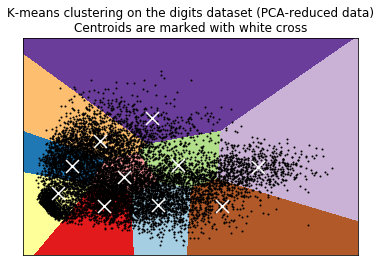

In [30]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = X_train, train_labels
data = scale(X_digits)
data_test=scale(X_test)

print(X_digits.shape)
print(y_digits.shape)
print(data.shape)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
reduced_data_test=PCA(n_components=2).fit_transform(data_test)

print("\nSCORE KMEAN 2 FEATURES")
print("Completeness Score : {}".format(metrics.completeness_score(labels,kmeans.labels_)))
print("Homogeneity Score : {}".format(metrics.homogeneity_score(labels, kmeans.labels_)))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data_test[:, 0], reduced_data_test[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [1]:
import numpy as np
#reducing pixel dim
def PCA_basic(matrix,nb):
    #1
    #X=np.transpose(matrix) #to have m by n matrix (n number of sample, m nb of variables)
    X=matrix
    m=X.shape[1]
    #2
    #Xmean=np.zeros((X.shape[0],1))
    #for i in range(X.shape[0]):
        #Xmean[i][0]=np.mean(X[i])
    Xmean=np.mean(X,axis=0)
    Xc=X-Xmean
    #3
    Xct=np.transpose(Xc)
    Mcov=(1./m)*Xct.dot(Xc)
    #4
    eig_val,eig_vec=np.linalg.eig(Mcov)
    #5
    index=[]
    min=eig_val[0]
    for i in range(0,len(eig_val)):
        if min>eig_val[i]:
            min=eig_val[i]
    for j in range(0,nb):
        max=min
        k=0
        for i in range(0,len(eig_val)):
            if eig_val[i]>max:
                k=i
                max=eig_val[i]
        eig_val[k]=min-1
        index.append(k)
    res=np.zeros((eig_vec.shape[0],len(index)))
    for i in range(0,len(index)):
        res[:,i]=eig_vec[:,index[i]]
    
    res2=X.dot(res)
    return res2
    

Automatically created module for IPython interactive environment
(60000, 784)
(60000,)
(60000, 784)
n_digits: 10, 	 n_samples 60000, 	 n_features 784


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part



SCORE KMEAN 2 FEATURES
Completeness Score : 0.34110341549662226
Homogeneity Score : 0.3394183510896936


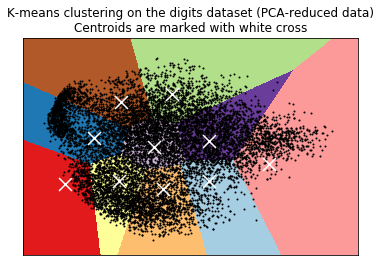

In [5]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = X_train, train_labels
#data = scale(X_digits)
#data_test=scale(X_test)
data = X_digits
data_test=X_test

print(X_digits.shape)
print(y_digits.shape)
print(data.shape)

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA_basic(data,2)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)
reduced_data_test=PCA_basic(data_test,2)

print("\nSCORE KMEAN 2 FEATURES")
print("Completeness Score : {}".format(metrics.completeness_score(labels,kmeans.labels_)))
print("Homogeneity Score : {}".format(metrics.homogeneity_score(labels, kmeans.labels_)))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data_test[:, 0], reduced_data_test[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# Problem 2

In [10]:
!pwd
!cd .. & ls

/home/asministrateur/Bureau/NCTU/Machine_Learning/ML/HW4
5043_HW4.pdf  HW4_0845209_simeongaumart.ipynb  pca_dataset  pca_dataset.zip


In [1]:
from matplotlib.pyplot import imread,imshow
import numpy as np

im=np.zeros((713,28,28))
k=0
for i in range(0,740):
    try:
        im[k]=imread("./pca_dataset/four"+str(i)+".jpg")
        k+=1
    except:
        print("four"+str(i)+".jpg not found")
        
print(im.shape)
imshow(im[0])

four8.jpg not found
four9.jpg not found
four75.jpg not found
four76.jpg not found
four77.jpg not found
four78.jpg not found
four79.jpg not found
four80.jpg not found
four81.jpg not found
four82.jpg not found
four83.jpg not found
four84.jpg not found
four85.jpg not found
four86.jpg not found
four87.jpg not found
four88.jpg not found
four89.jpg not found
four90.jpg not found
four91.jpg not found
four92.jpg not found
four93.jpg not found
four94.jpg not found
four95.jpg not found
four96.jpg not found
four97.jpg not found
four98.jpg not found
four99.jpg not found
(713, 28, 28)


In [2]:
img=im.reshape((im.shape[0], im.shape[1] * im.shape[2]))
print(img.shape)

(713, 784)


# (a)

In [70]:
#TEST

a=np.array([11,9,15,5,13,8])
#print(np.mean(a))
#print(img.shape[0])
#print(img.shape[1])
b=np.array([[1,1],[2,2]])
c=np.array([[1],[1]])
#print(b-c)
#print(np.transpose(b))
#print("\n")
val,vec=np.linalg.eig(b)
#print(val)
#print(vec)
d=np.zeros((2,2))
for i in range(2):
    d[:,i]=b[:,i]
#    for j in range(2):
#        d[j][i]=b[j][i]
#print(d)
aa=np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
bb=aa.reshape((aa.shape[0], aa.shape[1] * aa.shape[2]))
cc=bb.reshape((bb.shape[0],bb.shape[1]//2,bb.shape[1]//2))
print(aa)
print(bb)
print(cc)

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[[1 2 3 4]
 [5 6 7 8]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [18]:
a=np.array([[1,2,3],[4,5,6]])
print(a)
b=np.mean(a,axis=0)
print(b)
print(a-b)
print(abs(a-b))
print(a.reshape(-1))
print(a/a)
print(np.max(a))
print(np.min(a))

[[1 2 3]
 [4 5 6]]
[2.5 3.5 4.5]
[[-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]]
[[1.5 1.5 1.5]
 [1.5 1.5 1.5]]
[1 2 3 4 5 6]
[[1. 1. 1.]
 [1. 1. 1.]]
6
1


In [9]:
z=3+4j
print(abs(z))
x=np.array([[3+4j,4+5j],[5+6j,7+8j]])
print(x)
x=x.real
print(x)


5.0
[[3.+4.j 4.+5.j]
 [5.+6.j 7.+8.j]]
[[3. 4.]
 [5. 7.]]


In [43]:
import numpy as np
#reducing pixel dim
def PCA_basic(matrix,nb):
    #1
    #X=np.transpose(matrix) #to have m by n matrix (n number of sample, m nb of variables)
    X=matrix
    m=X.shape[1]
    #2
    #Xmean=np.zeros((X.shape[0],1))
    #for i in range(X.shape[0]):
        #Xmean[i][0]=np.mean(X[i])
    Xmean=np.mean(X,axis=0)
    Xc=X-Xmean
    #3
    Xct=np.transpose(Xc)
    Mcov=(1./m)*Xct.dot(Xc)
    #4
    eig_val,eig_vec=np.linalg.eig(Mcov)
    #5
    index=[]
    min=eig_val[0]
    for i in range(0,len(eig_val)):
        if min>eig_val[i]:
            min=eig_val[i]
    for j in range(0,nb):
        max=min
        k=0
        for i in range(0,len(eig_val)):
            if eig_val[i]>max:
                k=i
                max=eig_val[i]
        eig_val[k]=min-1
        index.append(k)
    res=np.zeros((eig_vec.shape[0],len(index)))
    for i in range(0,len(index)):
        res[:,i]=eig_vec[:,index[i]]
    
    res2=X.dot(res)
    return res2
    

In [44]:
#PCA 2
from matplotlib.pyplot import imshow
img2_=PCA_basic(img,2)
print(img2_.shape)
print(img2_[0])

(713, 2)
[-1009.24070172   234.28164739]


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


In [45]:
#TEST PCA SKLEARN
from sklearn.decomposition import PCA
test2 = PCA(n_components=2).fit_transform(img)
print(test2.shape)
print(test2[0])

(713, 2)
[743.2862888   91.62932727]


(713, 16)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


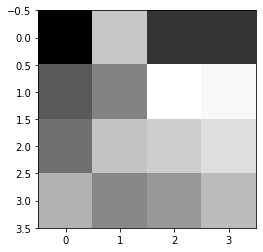

In [46]:
#PCA 16
from matplotlib.pyplot import imshow
img16_=PCA_basic(img,16)
print(img16_.shape)
img16plot=img16_.reshape((img16_.shape[0],img16_.shape[1]//4,img16_.shape[1]//4))
imshow(img16plot[0],cmap='gray')

(713, 64)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


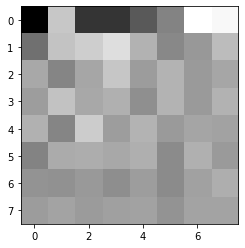

In [47]:
#PCA 64
from matplotlib.pyplot import imshow
img64_=PCA_basic(img,64)
print(img64_.shape)
img64plot=img64_.reshape((img64_.shape[0],img64_.shape[1]//8,img64_.shape[1]//8))
imshow(img64plot[0],cmap='gray')

(713, 256)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


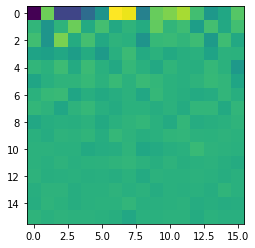

In [48]:
#PCA 256
from matplotlib.pyplot import imshow
img256_=PCA_basic(img,256)
print(img256_.shape)
img256plot=img256_.reshape((img256_.shape[0],img256_.shape[1]//16,img256_.shape[1]//16))
imshow(img256plot[0])

(713, 256)


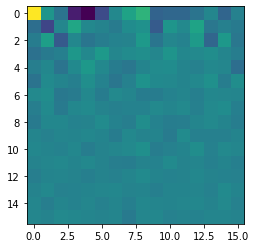

In [49]:
#TEST PCA SKLEARN
from sklearn.decomposition import PCA
from matplotlib.pyplot import imshow
test3 = PCA(n_components=256).fit_transform(img)
print(test3.shape)
test3plot=test3.reshape((test3.shape[0],test3.shape[1]//16,test3.shape[1]//16))
imshow(test3plot[0])

# pca test

In [50]:
import numpy as np
#reducing image dim
def PCA_basic2(matrix,nb):
    #1
    X=matrix
    m=X.shape[1]
    #2
    Xmean=np.mean(X,axis=0)
    Xc=X-Xmean
    #3
    Xct=np.transpose(Xc)
    Mcov=(1./m)*Xct.dot(Xc)
    #4
    eig_val,eig_vec=np.linalg.eig(Mcov)
    #5
    index=[]
    min=eig_val[0]
    for i in range(0,len(eig_val)):
        if min>eig_val[i]:
            min=eig_val[i]
    for j in range(0,nb):
        max=min
        k=0
        for i in range(0,len(eig_val)):
            if eig_val[i]>max:
                k=i
                max=eig_val[i]
        eig_val[k]=min-1
        index.append(k)
    res=np.zeros((eig_vec.shape[0],len(index)))
    for i in range(0,len(index)):
        res[:,i]=eig_vec[:,index[i]]
        
    return res
    

In [51]:
m2=PCA_basic2(img,2)
print(m2.shape)

(784, 2)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


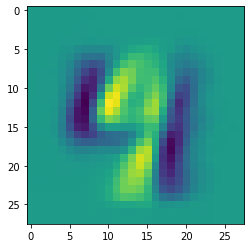

In [52]:
im2=np.transpose(m2)
from matplotlib.pyplot import imshow
im2p=im2.reshape((im2.shape[0],im2.shape[1]//28,im2.shape[1]//28))
imshow(im2p[0])

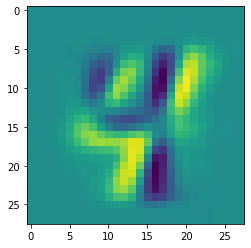

In [53]:
from matplotlib.pyplot import imshow
im2p=im2.reshape((im2.shape[0],im2.shape[1]//28,im2.shape[1]//28))
imshow(im2p[1])

(2, 784)
(1, 784)


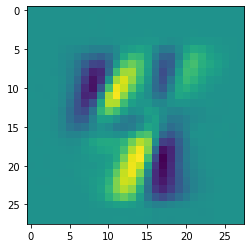

In [54]:
from matplotlib.pyplot import imshow
print(im2.shape)
im2f=np.zeros((1,784))
for i in range(784):
    im2f[0,i]=im2[0,i]+im2[1,i]
print(im2f.shape)
im2p=im2f.reshape((1,im2f.shape[1]//28,im2f.shape[1]//28))
imshow(im2p[0])

(713, 2)
(2, 784)
(1, 784)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


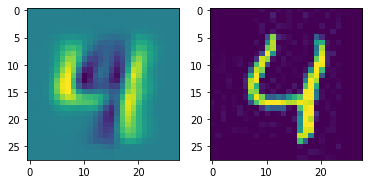

In [55]:
from matplotlib.pyplot import imshow, subplot
img2_=PCA_basic(img,2)
print(img2_.shape)
a=img2_[0,0]
b=img2_[0,1]

print(im2.shape)
im2f=np.zeros((1,784))
for i in range(784):
    im2f[0,i]=a*im2[0,i]+b*im2[1,i]
print(im2f.shape)
im2p=im2f.reshape((1,im2f.shape[1]//28,im2f.shape[1]//28))
subplot(1,2,1)
imshow(im2p[0])
subplot(1,2,2)
imshow(im[0])

(713, 2)
(2, 784)
(1, 784)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


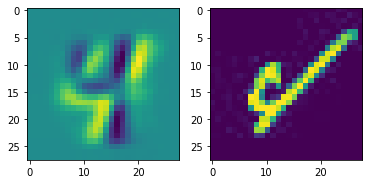

In [56]:
from matplotlib.pyplot import imshow, subplot
img2_=PCA_basic(img,2)
print(img2_.shape)
a=img2_[712,0]
b=img2_[712,1]

print(im2.shape)
im2f=np.zeros((1,784))
for i in range(784):
    im2f[0,i]=a*im2[0,i]+b*im2[1,i]
print(im2f.shape)
im2p=im2f.reshape((1,im2f.shape[1]//28,im2f.shape[1]//28))
subplot(1,2,1)
imshow(im2p[0])
subplot(1,2,2)
imshow(im[712])

/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


(713, 256)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


(256, 784)
(1, 784)


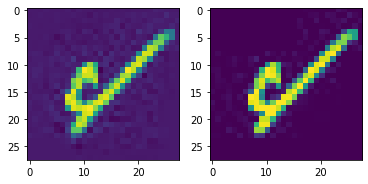

In [57]:
from matplotlib.pyplot import imshow, subplot
img2_=PCA_basic(img,256)
print(img2_.shape)
a=[]
for i in range(0,256):
    a.append(img2_[712,i])


m2=PCA_basic2(img,256)
im2=np.transpose(m2)
print(im2.shape)
im2f=np.zeros((1,784))
for i in range(784):
    for j in range(256):
        im2f[0,i]+=a[j]*im2[j,i]
print(im2f.shape)
im2p=im2f.reshape((1,im2f.shape[1]//28,im2f.shape[1]//28))
subplot(1,2,1)
imshow(im2p[0])
subplot(1,2,2)
imshow(im[712])

/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


(713, 4)
(4, 784)
(1, 784)


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


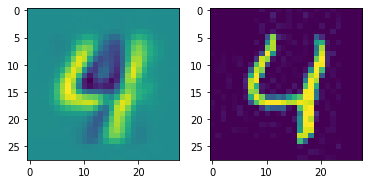

In [62]:
from matplotlib.pyplot import imshow, subplot
n=0
k=4
img2_=PCA_basic(img,k)
print(img2_.shape)
a=[]
for i in range(0,k):
    a.append(img2_[n,i])


m2=PCA_basic2(img,k)
im2=np.transpose(m2)
print(im2.shape)
im2f=np.zeros((1,784))
for i in range(784):
    for j in range(k):
        im2f[0,i]+=a[j]*im2[j,i]
print(im2f.shape)
im2p=im2f.reshape((1,im2f.shape[1]//28,im2f.shape[1]//28))
subplot(1,2,1)
imshow(im2p[0])
subplot(1,2,2)
imshow(im[n])

/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


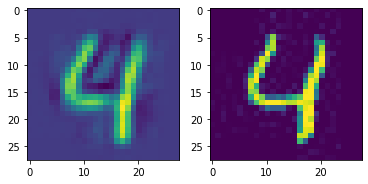

In [68]:
import matplotlib.pyplot as plt
n=0
k=2
eig=PCA_basic2(img,k)
eigt=np.transpose(eig)
imgk=img.dot(eig.dot(eigt))
plt.subplot(1,2,1)
plt.imshow(imgk[n].reshape(28,28))
plt.subplot(1,2,2)
plt.imshow(img[n].reshape(28,28))

In [73]:

imgk=[]
for i in range(1,257):
    eig=PCA_basic2(img,i)
    eigt=np.transpose(eig)
    imgk.append(img.dot(eig.dot(eigt)))
print("done")

/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


done


dim reduced to 256


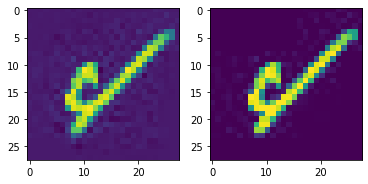

In [78]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
n=712
for i in range(len(imgk)):
    print("dim reduced to "+str(i+1))
    plt.subplot(1,2,1)
    plt.imshow(imgk[i][n].reshape(28,28))
    plt.subplot(1,2,2)
    plt.imshow(img[n].reshape(28,28))
    plt.show()
    clear_output(wait=True)
    time.sleep(0.5)

In [71]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
for i in range(len(img)):
    plt.subplot(1,2,1)
    plt.imshow(img[i].reshape(28,28))
    plt.subplot(1,2,2)
    plt.imshow(img[i].reshape(28,28))
    plt.show()
    clear_output(wait=True)


KeyboardInterrupt: 

# (b)

/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


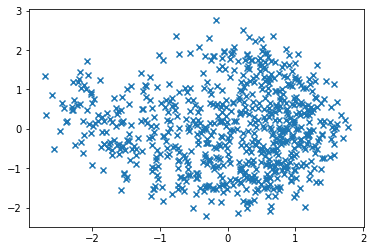

In [76]:
import matplotlib.pyplot as plt

img2=PCA_basic(img,2)
img3=scale(img2)
plt.scatter(img3[:, 0], img3[:, 1],
            marker='x')

713
2


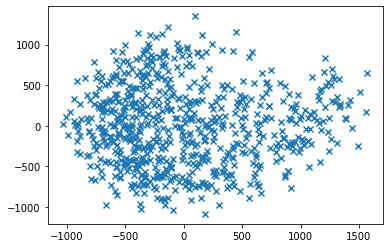

In [57]:
#TEST
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

imgtest = PCA(n_components=2).fit_transform(img)

print(len(imgtest))
print(len(imgtest[0]))


plt.scatter(imgtest[:, 0], imgtest[:, 1],
            marker='x')